In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc,log_loss
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import make_classification

In [50]:
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=7)

In [52]:
# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

In [53]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [54]:
fpr1,tpr1,thr1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thr2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

In [55]:
fpr1

array([0.        , 0.        , 0.        , 0.00657895, 0.00657895,
       0.01315789, 0.01315789, 0.01973684, 0.01973684, 0.22368421,
       0.22368421, 0.23026316, 0.23026316, 0.24342105, 0.24342105,
       0.25      , 0.25      , 0.48026316, 0.48026316, 0.49342105,
       0.49342105, 0.85526316, 0.85526316, 0.90789474, 0.90789474,
       1.        ])

In [56]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [57]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9716838549075391 0.9509468349928877


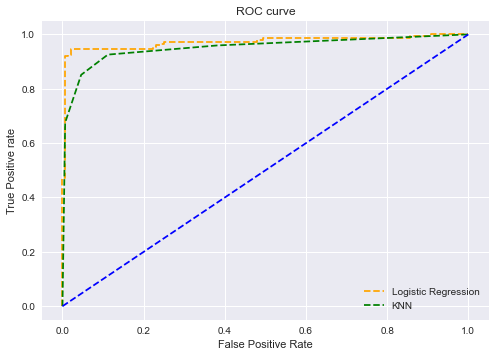

In [58]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();